## Comparing the proportion of rhyming lines

In this notebook, we will use the metric rhymes() defined in
lyrics_analysis.evaluation to compare the number of rhyming lines. We
will compare lyrics divided by two criteria: first, we will compare
individual genres, and second, we will compare actual song lyrics
to lyrics with randomly shuffled lines.

The rhymes() metric calculates the proportion of lines that rhyme
with any other line in a window of certain size.

The rhymes() function takes four parameters:
+ *lyrics*: list of strings representing the lyrics of the song
+ *rhyme_level*: how many last phonemes of two words have to be
equal for them to be considered a rhyme
+ *max_distance*: specifies how far a line can be to still be
considered a rhyme; the window searched for rhymes is then of size
2*max_distance+1
+ *arpabet*: a structure storing word pronunciations

In [1]:
# import necessary modules
import ijson
import matplotlib.pyplot as plt
%matplotlib inline

from lyrics_analysis import Song
import lyrics_analysis.evaluation

Define a generator that will retrieve data from a JSON file and yield
a Song object with the relevant data for each entry.

In [2]:
def retrieve_songs(file):
    with open(file) as f:
        songs = ijson.items(f, 'item')
        for song in songs:
            yield Song(
                song["lyrics"], song["genre"], song["artist"]
            )
            

Define a dictionary that will store the scores.

In [3]:
scores_by_genre = {
    "rap": [],
    "pop": [],
    "rock": [],
    "r-b": [],
    "country": []
}

Now, parse the randomly selected set of n=10,000 songs and calculate
the proportion of rhymes for each one.

In [4]:
for song in retrieve_songs("../data/cleaned/eval_set_10000_lyrics.json"):
    score = lyrics_analysis.evaluation.rhymes(song.lyrics)
    scores_by_genre[song.genre].append(score)
    

Let's look at the average score for each genre.

In [5]:
for genre, scores in scores_by_genre.items():
    print(genre, sum(scores)/len(scores))
    

rap 0.2614384306665149
pop 0.3090920827977727
rock 0.2748586515232251
r-b 0.3035525200934478
country 0.26321495638584724


Now, let's plot a histogram to see if there are any significant
differences.

Text(0, 0.5, 'n')

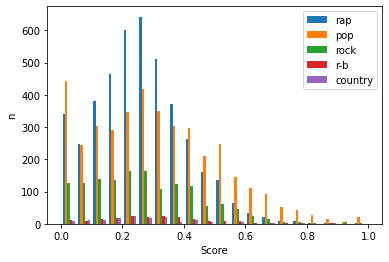

In [6]:
n_bins = 20
genres = ["rap", "pop", "rock", "r-b", "country"]
data = [scores_by_genre[genre] for genre in genres]
plt.hist(data, bins=n_bins)
plt.legend(genres)
plt.xlabel("Score")
plt.ylabel("n")

Now, let's compare song lyrics in the correct order to shuffled lyrics.

In [7]:
song_scores = scores_by_genre["rap"]\
            + scores_by_genre["pop"]\
            + scores_by_genre["rock"]\
            + scores_by_genre["r-b"]\
            + scores_by_genre["country"]
            

In [ ]:
shuffled_scores = []
for song in retrieve_songs("../data/cleaned/eval_set_10000_lyrics_shuffled.json"):
    shuffled_scores.append(lyrics_analysis.evaluation.rhymes(song.lyrics))


Finally, plot a histogram that compares the scores of original and
shuffled song lyrics.

In [ ]:
n_bins = 20
plt.hist([song_scores, shuffled_scores], bins=n_bins)
plt.legend(["original", "shuffled"])
plt.xlabel("Score")
plt.ylabel("n")

Text(0, 0.5, 'n')